# [E-05] HousePricePrediction - Kaggle

## 집값 예측하기
### 학습 목표
* 데이터 사이언스 관련 최대 커뮤니티인 캐글의 경진대회에 직접 참여해서 문제를 해결해본다. 
* 캐글에서 데이터를 내려받는 것으로부터 시작해서, 로컬 서버에서 자유롭게 다루어보며 문제 해결을 위한 고민을 해본다.
* 앙상블 기법의 개념와 강점을 이해. 여러 모델의 예측 결과를 Averaging 한 최종 결과로 캐글에 제출해본다
* 하이퍼 파라미터 튜닝의 필요성과 의미를 이해하고, Grid Search, Random Search 등의 기법을 알아본다.
* Grid Search 기법을 활용해서 직접 하이퍼 파라미터 튜닝 실험을 해보고, 모델의 성능을 최대한 끌어올려본다.


### 목차
#### 1. 들어가며    
  1-1. 모델의 성능을 최적화하는 방법    
  1-2. EDA   
#### 2.  캐글 Kaggle  
  2-1. 참가 규칙, 평가 기준 살펴보기   
  2-2. 데이터 살펴보기      
  2-3. Baseline 모델 셋팅 및 준비   
  2-4. 라이브러리, 데이터 가져오기   
  2-5. 데이터 이해하기   
  2-6. 간단한 전처리   
  2-7. 각 변수들의 분포 확인   
#### 3. Baseline 모델 설계
  3-1. 모델링  
  3-2. 앙상블 기법(Ensemble)    
  3-3. Average Blending    
  3-4. 교차 검증 Cross Validation    
  3-5. Make Submission    
#### 4. 최적의 모델 만들기
  4-1. 하이퍼 파라미터 튜닝    
  4-2. 함수 사용   
  4-3. 그리드 탐색   
  4-4. 제출하기  
#### 5. 회고
  5-1. 이번 프로젝트에서 어려웠던 점      
  5-2. 루브릭 평가 지표를 맞추기 위해 시도한 것들       
  5-3. 앞으로 더 공부할 내용       
  5-4. 참고사이트   


### 루브릭 평가 기준
|평가문항|상세기준|
|:---|:---|
|1. 캐글 데이터분석 전과정이 성공적으로 진행되었는가?|데이터 전처리, 모델학습, 예측의 전체 과정을 거쳐 캐글 submission까지 진행되었다.|
|2. 전처리, 학습과정 및 결과에 대한 설명이 시각화를 포함하여 체계적으로 진행되었는가?|제출된 노트북이 캐글 커널로 사용될 수 있을 만큼 전처리, 학습, 최적화 진행 과정이 체계적으로 기술되었다.|
|3. 회귀모델 예측정확도가 기준 이상 높게 나왔는가?|다양한 피처 엔지니어링과 하이퍼 파라미터 튜닝 등의 최적화 기법을 통해 캐글 리더보드의 Private score 기준 110000 이하의 점수를 얻었다.|   
<br/>


## 1. 들어가며

### 1-1. 모델 성능을 최적화하는 방법
* EDA 과정을 통해 불필요한 피처를 골라내거나 적절하게 피처를 수정하는 등의 피처 엔지니어링을 진행해서 데이터를 정제하는 것
* 데이터를 어떻게 정제하느냐에 따라 모델의 파라미터를 튜닝하는 것만으로는 절대 얻을 수 없는 성능 향상이 이루어짐
* 하이퍼 파라미터 튜닝

### 1-2. EDA(Exploratory Data Analysis): 데이터를 탐색한다
* 정의
  * 수집한 데이터가 들어왔을 때, 이를 다양한 각도에서 관찰하고 이해하는 과정
  * 데이터를 분석하기 전에 그래프나 통계적인 방법으로 자료를 직관적으로 바라보는 과정
  
* 과정   
  1) 분석의 목적과 변수가 무엇이 있는지 확인하기   
  2) 데이터를 전체적으로 살펴보기: 데이터에 문제 없는지 확인하기. head, tail 확인. 추가적으로 다양한 탐색 진행(이상치, 결측치 등)      
  3) 데이터의 개별 속성값을 관찰: 각 속성 값이 예측한 범위와 분포를 갖는지 확인. 만약 아니라면 이유를 확인   
  4) 속성 간의 관계에 초점을 맞추어, 개별 속성 관찰에서 찾아내지 못했던 패턴을 발견 (상관관계, 시각화 등)   
  
* Pandas 라이브러리는 수학 메서드와 통계 메서드를 기본적으로 가지고 있음
* 통계 데이터를 활용해서 데이터의 대푯값과 분산을 구하는 것이 EDA의 기본

---

## 2. 캐글

### 2-1. 참가 규칙, 평가 기준 살펴보기 
* 평가기준
  * RMSE
  * 이번 대회의 평가 방식은 Root Mean Squared Error 입니다.
  * $${\sqrt{ {1 \over N} \sum{(yt - y{pr})}^2}} $$
  * 실제 정답과 예측한 값의 차이의 제곱을 평균한 값의 제곱근입니다.
  * 그 두 가지 값의 차이를 사용해 얼마나 떨어져 있는지 계산할 수 있는 RMSE를 평가 척도로 사용하는 것이 합리적입니다.
 
 
### 2-2. 데이터 살펴보기
A. Description, 대회 소개   
B. Evaluation, 점수 평가 기준   
C. Prize, 상품   
D. Timeline, 대회 일정   
E. Rules, 대회 규칙   
F. Data Description, 데이터 설명   
  * train.csv 예측 모델 만들기 위해 사용하는 학습 데이터. 집의 정보와 예측할 변수인 가격(Price) 변수를 갖고 있음
  * test.csv 학습셋으로 만든 모델을 가지고 예측할 가격(Price) 변수를 제외한 집의 정보가 담긴 테스트 데이터. 
  * sample_submission.csv - 제출시 사용할 수 형식
G. Data Explorer, 데이터 파일
```
$ mkdir -p ~/aiffel/kaggle_kakr_housing/data
$ ln -s ~/data/data/*.csv ~/aiffel/kaggle_kakr_housing/data
$ ls ~/aiffel/kaggle_kakr_housing/data  # 디렉토리 내 파일 확인
```

### 2-3. Baseline 모델 셋팅 및 준비
* **Baseline**: 기본적으로 문제 해결을 시작할 때 쉽게 사용해볼 수 있는 샘플
* 캐글의 **커널(Kernel)**: 주피터 노트북 형태의 파일이 캐글 서버에서 실행될 때 그 프로그램을 부르는 말
* 캐글의 커널 창 위에서 진행해도되고 노트북 파일을 다운로드받아서 진행해도됨

https://www.kaggle.com/kcs93023/2019-ml-month-2nd-baseline

#### Baseline 커널 파일 실행 준비
* Baseline의 모든 코드를 에러없이 잘 돌리기 위해서는 몇 가지 준비가 필요함

#### 데이터 파일을 현재 디렉토리로 옮기기

#### 필요한 라이브러리 설치하기
  * xgboost, lightgbm : 회위 모델을 구현하는데 사용하는 라이브러리
  * missingno : 결측 데이터 확인하는 라이브러리   
  
  ```
  $ conda install -c conda-forge xgboost=1.3.3
  $ conda install -c conda-forge lightgbm=3.1.1 
  $ conda install -c conda-forge missingno=0.4.2
  ```
  
  * missingno 
    * **시각화** 라이브러리를 통해 더 간단하게 결측치를 확인할 수 있도록 돕는 라이브러리
    ```python
$ import missingno as msno
    ```
    
#### Jupyter Notebook 파일 실행 후, matplotlib 시각화를 위한 셀 실행  
* Baseline 커널에는 다양한 시각화 코드가 있기 때문에 시각화 그래프 나타낼 수 있음


### 2-4.  라이브러리, 데이터 가져오기

In [1]:
import os
from os.path import join

import pandas as pd
import numpy as np
import seaborn as sns

import missingno as msno

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score
import xgboost as xgb
import lightgbm as lgb

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import warnings
warnings.filterwarnings("ignore")

/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(


데이터 경로 지정하기
* Kaggle 서버가 아닌 우리 Cloud Jupyter 에 있는 경로로 연결하기
  
데이터 살펴보기  
* train.csv - 예측 모델을 만들기 위해 사용하는 학습 데이터입니다. 집의 정보와 예측할 변수인 가격(Price) 변수를 가지고 있습니다.
* test.csv - 학습셋으로 만든 모델을 가지고 예측할 가격(Price) 변수를 제외한 집의 정보가 담긴 테스트 데이터 입니다.
* sample_submission.csv - 제출시 사용할 수 있는 예시 submission.csv 파일입니다.



In [2]:
data_dir = os.getenv('HOME')+'/aiffel/Exploration/E_05/kaggle_kakr_housing/data'

train_data_path = join(data_dir, 'train.csv')
sub_data_path = join(data_dir, 'test.csv')      # 테스트, 즉 submission 시 사용할 데이터 경로

### 2-5. 데이터 이해하기

pandas의 read_csv 함수를 사용해 데이터를 읽어오고, 각 변수들이 나타내는 의미를 살펴보겠습니다.
1. ID : 집을 구분하는 번호
2. date : 집을 구매한 날짜
3. price : 타겟 변수인 집의 가격
4. bedrooms : 침실의 수
5. bathrooms : 침실당 화장실 개수
6. sqft_living : 주거 공간의 평방 피트
7. sqft_lot : 부지의 평방 피트
8. floors : 집의 층 수
9. waterfront : 집의 전방에 강이 흐르는지 유무 (a.k.a. 리버뷰)
10. view : 집이 얼마나 좋아 보이는지의 정도
11. condition : 집의 전반적인 상태
12. grade : King County grading 시스템 기준으로 매긴 집의 등급
13. sqft_above : 지하실을 제외한 평방 피트
14. sqft_basement : 지하실의 평방 피트
15. yr_built : 집을 지은 년도
16. yr_renovated : 집을 재건축한 년도
17. zipcode : 우편번호
18. lat : 위도
19. long : 경도
20. sqft_living15 : 2015년 기준 주거 공간의 평방 피트(집을 재건축했다면, 변화가 있을 수 있음)
21. sqft_lot15 : 2015년 기준 부지의 평방 피트(집을 재건축했다면, 변화가 있을 수 있음)

#### 데이터 불러오기
data, sub 이라는 변수로 불러오기  


학습 데이터는 약 1만 5천개, 테스트 데이터는 약 6천개.
테스트 데이터는 우리가 맞추어야 할 집의 가격, price가 없기 때문에 컬럼이 하나 더 적음   

In [3]:
data = pd.read_csv(train_data_path)
sub = pd.read_csv(sub_data_path)
print('train data dim : {}'.format(data.shape))
print('sub data dim : {}'.format(sub.shape))

train data dim : (15035, 21)
sub data dim : (6468, 20)


#### 학습 데이터에서 라벨 제거하기 
* price 컬럼은 따로 y라는 변수에 저장한 후, 해당 컬럼 지우기!


In [4]:
y = data['price']

del data['price']

# data 컬럼 확인하기
print(data.columns)

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


#### 학습 데이터와 테스트 데이터 합치기
* 모델 학습시키기 전에, 전체 데이터에 대해 탐색
* pd.concat 으로 데이터 합치기

* **pd.concat**
  * 데이터의 속성 형태가 동일한 데이터셋끼리 합칠 때 사용할 수 있는 pandas의 DataFrame 합치는 함수 
  * parameter default setting
    - axis = 0 > 0은 위+아래로 합치기, 1은 왼쪽+오른쪽으로 합치기
    - join = 'outer' > 'outer'은 합집합, 'inner'는 교집합
    - ignore_index = False > False는 기존 index 유지, True는 기존 index 무시
    - keys = None > 계층적 index 사용하려면 keys 튜플 입력
    - levels = None
    - names = None > index에 이름 부여하려면 names 튜플 입력
    - verify_integrity = False > True는 index 중복 확인
    - copy = True > 복사    

* 모델 학습 진행할 때에는 다시 분리해야하니까 데이터 합치기 전에 train_len, training data 개수를 저장해서 추후에 학습 데이터만 불러올 수 있는 인덱스를 사용

In [5]:
train_len = len(data)
data = pd.concat((data, sub), axis=0)

# 전체 데이터 숫자 확인하기
print(len(data))

21503


In [6]:
data.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


### 2-6. 간단한 전처리 
* 빈 데이터와 전체 데이터의 분포를 확인하는 전처리 작업
* 각 변수들에 대해 결측 유무를 확인하고, 분포를 확인해보면서 간단하게 전처리를 하겠습니다
* missingno 라이브러리의 matrix 함수를 사용하면, 데이터의 결측 상태를 시각화를 통해 살펴볼 수 있습니다.

* missingno 라이브러리: 결측치, 즉 빈 데이터가 있는지 확인하는 라이브러리

In [7]:
print(data)

         id             date  bedrooms  bathrooms  sqft_living  sqft_lot  \
0         0  20141013T000000         3       1.00         1180      5650   
1         1  20150225T000000         2       1.00          770     10000   
2         2  20150218T000000         3       2.00         1680      8080   
3         3  20140627T000000         3       2.25         1715      6819   
4         4  20150115T000000         3       1.50         1060      9711   
...     ...              ...       ...        ...          ...       ...   
6463  21498  20140626T000000         3       1.75         1500     11968   
6464  21499  20150126T000000         3       2.00         1490      1126   
6465  21500  20150219T000000         3       2.50         1310      1294   
6466  21501  20140623T000000         2       0.75         1020      1350   
6467  21502  20150116T000000         3       2.50         1600      2388   

      floors  waterfront  view  condition  grade  sqft_above  sqft_basement  \
0       

<AxesSubplot:>

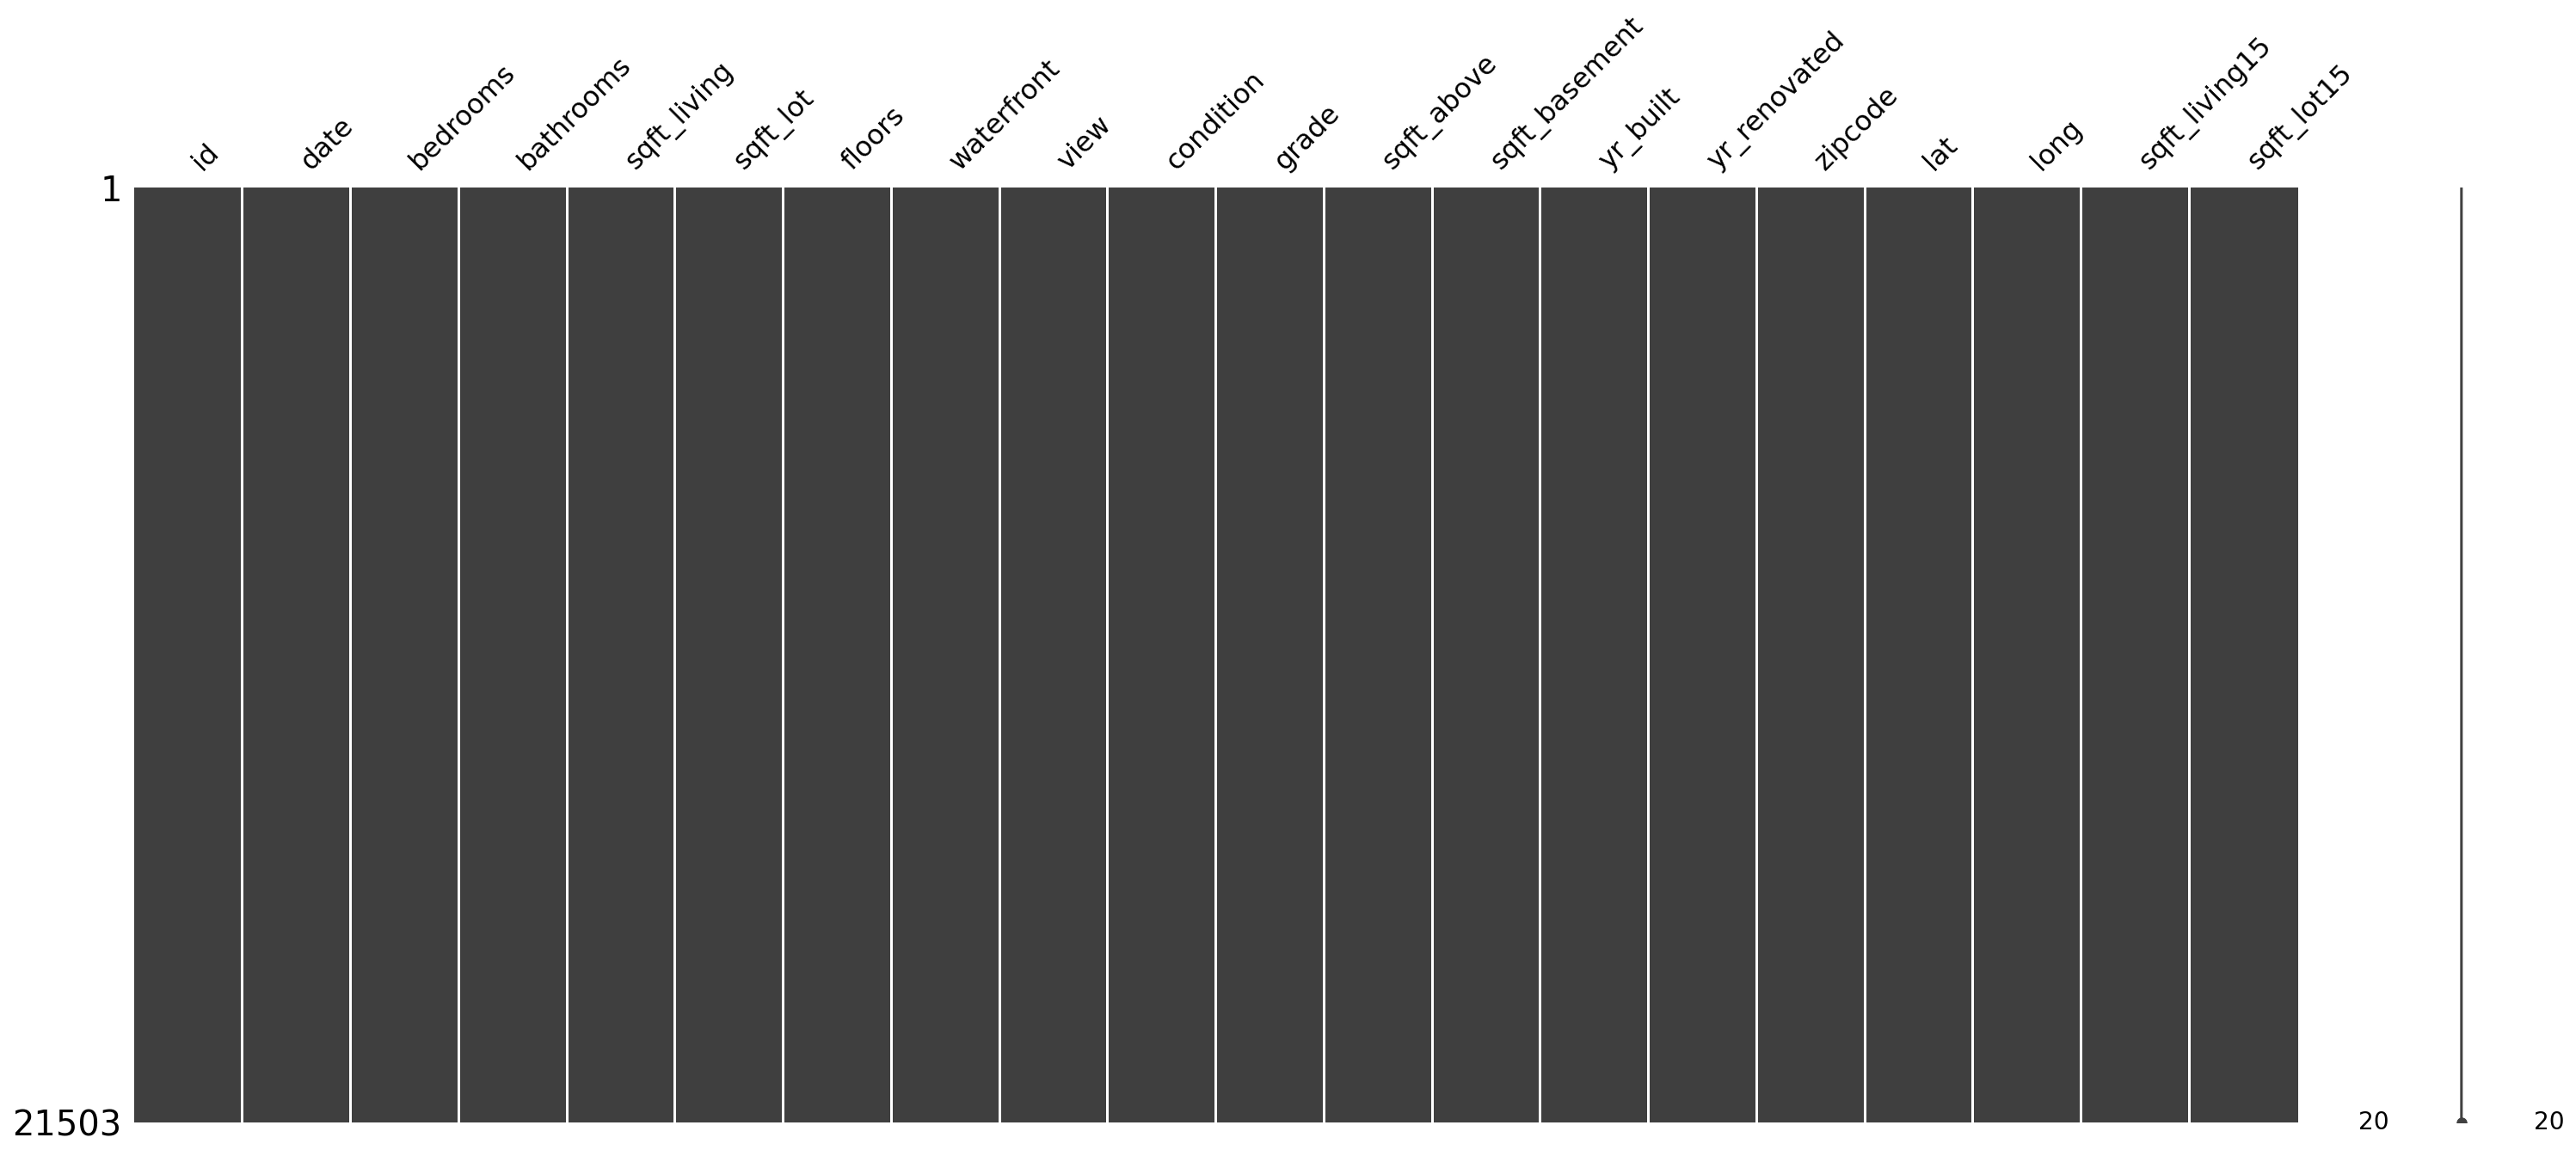

In [8]:
msno.matrix(data)

* data라는 DataFrame을 매트릭스 모양 그대로 시각화한 것
* 특정 row, col에 NaN이라는 결측치가 있었다면 해당 부분이 하얗게 나옴


* 모든 변수에 결측치가 없는 것으로 보이지만, 혹시 모르니 확실하게 살펴보겠습니다.<br>

* id를 가지고 데이터프레임 인덱싱을 적용해 사용법 익히기
  * id 컬럼이 결측치인지 확인
  * 결측치인 데이터만 뽑아냄
  * 결측치 데이터 개수 세기

In [9]:
# 1. id 컬럼이 결측치인지 확인합니다.
null_check = pd.isnull(data['id'])
print(null_check)

0       False
1       False
2       False
3       False
4       False
        ...  
6463    False
6464    False
6465    False
6466    False
6467    False
Name: id, Length: 21503, dtype: bool


In [10]:
# 2. 결측치인 데이터만 뽑아냅니다.
null_data = data.loc[null_check, 'id']
null_data.head()

Series([], Name: id, dtype: int64)

* 인덱싱을 이용하면 데이터프레임을 그대로 사용할 수 있다는 것이 큰 장점
* 인덱싱 없었으면 for문 사용해야하는데, 인덱싱이 속도도 훨씬 빠름!

In [11]:
# 3. 결측치인 데이터 개수 세기
for c in data.columns:
    print('{} : {}'.format(c, len(data.loc[pd.isnull(data[c]), c].values)))

id : 0
date : 0
bedrooms : 0
bathrooms : 0
sqft_living : 0
sqft_lot : 0
floors : 0
waterfront : 0
view : 0
condition : 0
grade : 0
sqft_above : 0
sqft_basement : 0
yr_built : 0
yr_renovated : 0
zipcode : 0
lat : 0
long : 0
sqft_living15 : 0
sqft_lot15 : 0


#### id, date 변수 정리
id 변수는 모델이 집값을 예측하는데 도움을 주지 않으므로 제거합니다.<br>
date 변수는 연월일시간으로 값을 가지고 있는데, 연월만 고려하는 범주형 변수로 만들겠습니다.

In [12]:
# sub_id 에 id 컬럼 데이터를 저장
sub_id = data['id'][train_len:]
# 실제 데이터셋에서는 id 컬럼 제거하기
del data['id']

# date 컬럼 안에 날짜를 필요한 부분만 6자리로 자르기
data['date'] = data['date'].apply(lambda x : str(x[:6])).astype(str)

str(x[:6])   
20141013T000000 형식의 데이터를 연/월 데이터만 사용하기 위해 6자리로 자르기 위한 코드!   

### 2-7. 각 변수들의 분포 확인
* 한쪽으로 치우친 분포는 모델이 결과를 예측하기에 좋지 않은 영향을 미치므로 다듬어줄 필요가 있습니다.
* data컬럼은 apply 함수로 필요한 부분만 자르기
* str(x[:6])으로 처리한 것은, 20141013T000000 형식의 데이터를 연/월 데이터만 사용하기 위해 201410까지 자른 것

In [13]:
data['date'] = data['date'].apply(lambda x : str(x[:6]))

data.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,201410,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,201502,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,201502,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,201406,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,201501,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


* 전체 데이터들의 분포 확인
* 너무 치우친 분포를 가지는 컬럼의 경우 모델이 결과를 예측하는데에 좋지 않은 영향을 미치므로 다듬는 작업 해야함
* 시각화 코드를 통해 id 컬럼을 제외한 19개 컬럼에 대해 한 번에 모든 그래프를 그려줌!
* subplot에 그래프를 그리기 위해 2중 for문 사용
* 그래프 종류는 sns.kdeplot 사용
  * 이산(discrete) 데이터의 경우에도 부드러운 곡선으로 전체 분포를 확인할 수 있도록 하는 시각화 함수

In [14]:
data.columns

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

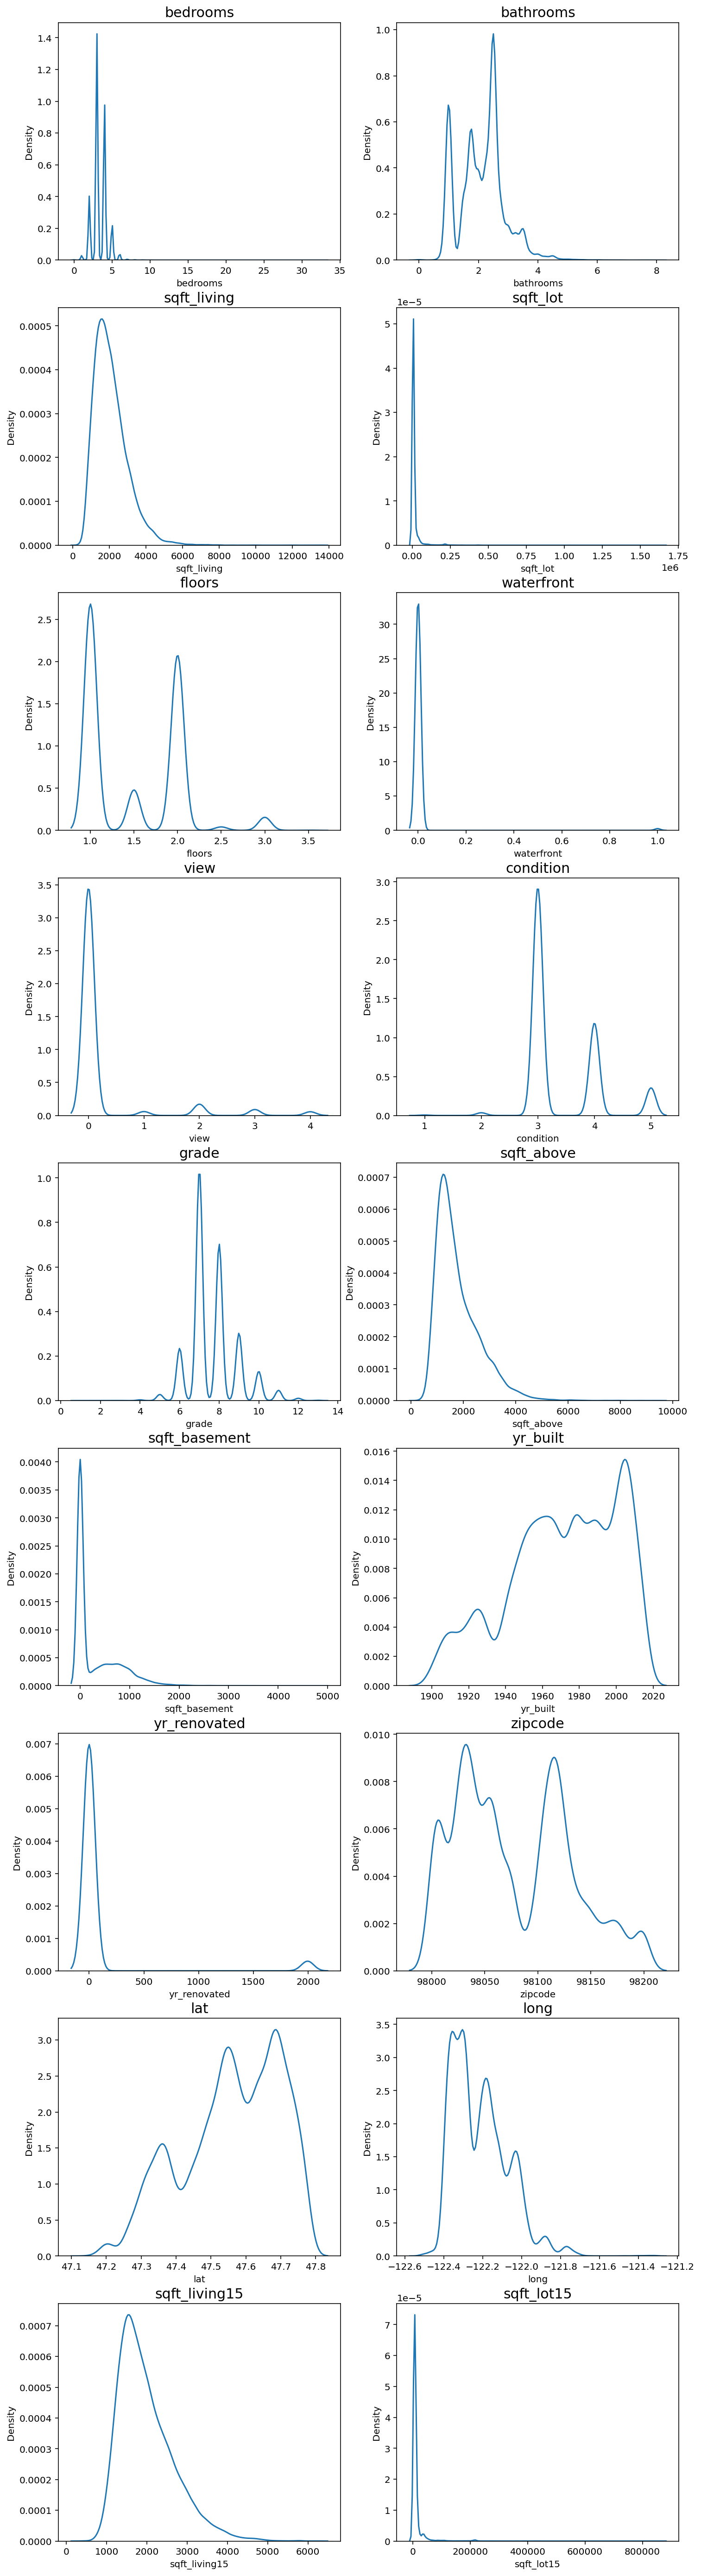

In [15]:
fig, ax = plt.subplots(9, 2, figsize=(12, 50))   # 가로스크롤 때문에 그래프 확인이 불편하다면 figsize의 x값을 조절해 보세요. 

# id 변수(count==0인 경우)는 제외하고 분포를 확인합니다.
count = 1
columns = data.columns
for row in range(9):
    for col in range(2):
        sns.kdeplot(data=data[columns[count]], ax=ax[row][col])
        ax[row][col].set_title(columns[count], fontsize=15)
        count += 1
        if count == 19 :
            break

* price, bedrooms, sqft_living, sqft_lot, sqft_above, sqft_basement 변수가 한쪽으로 치우친 경향을 보였습니다.<br>
* log-scaling(로그 변환)을 통해 데이터 분포를 정규분포에 가깝게 만들어 보겠습니다.

* log-scaling 로그 변환



* 치우친 컬럼들을 skew_columns 리스트 안에 모두 담고, np.log1p()를 활용해서 로그 변환 해주기
* numpy.log1p() 함수는 입력 배열의 각 요소에 대해 자연로그 log(1+x)를 반환해주는 함수

In [16]:
skew_columns = ['bedrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_lot15', 'sqft_living15']

for c in skew_columns:
    data[c] = np.log1p(data[c].values)

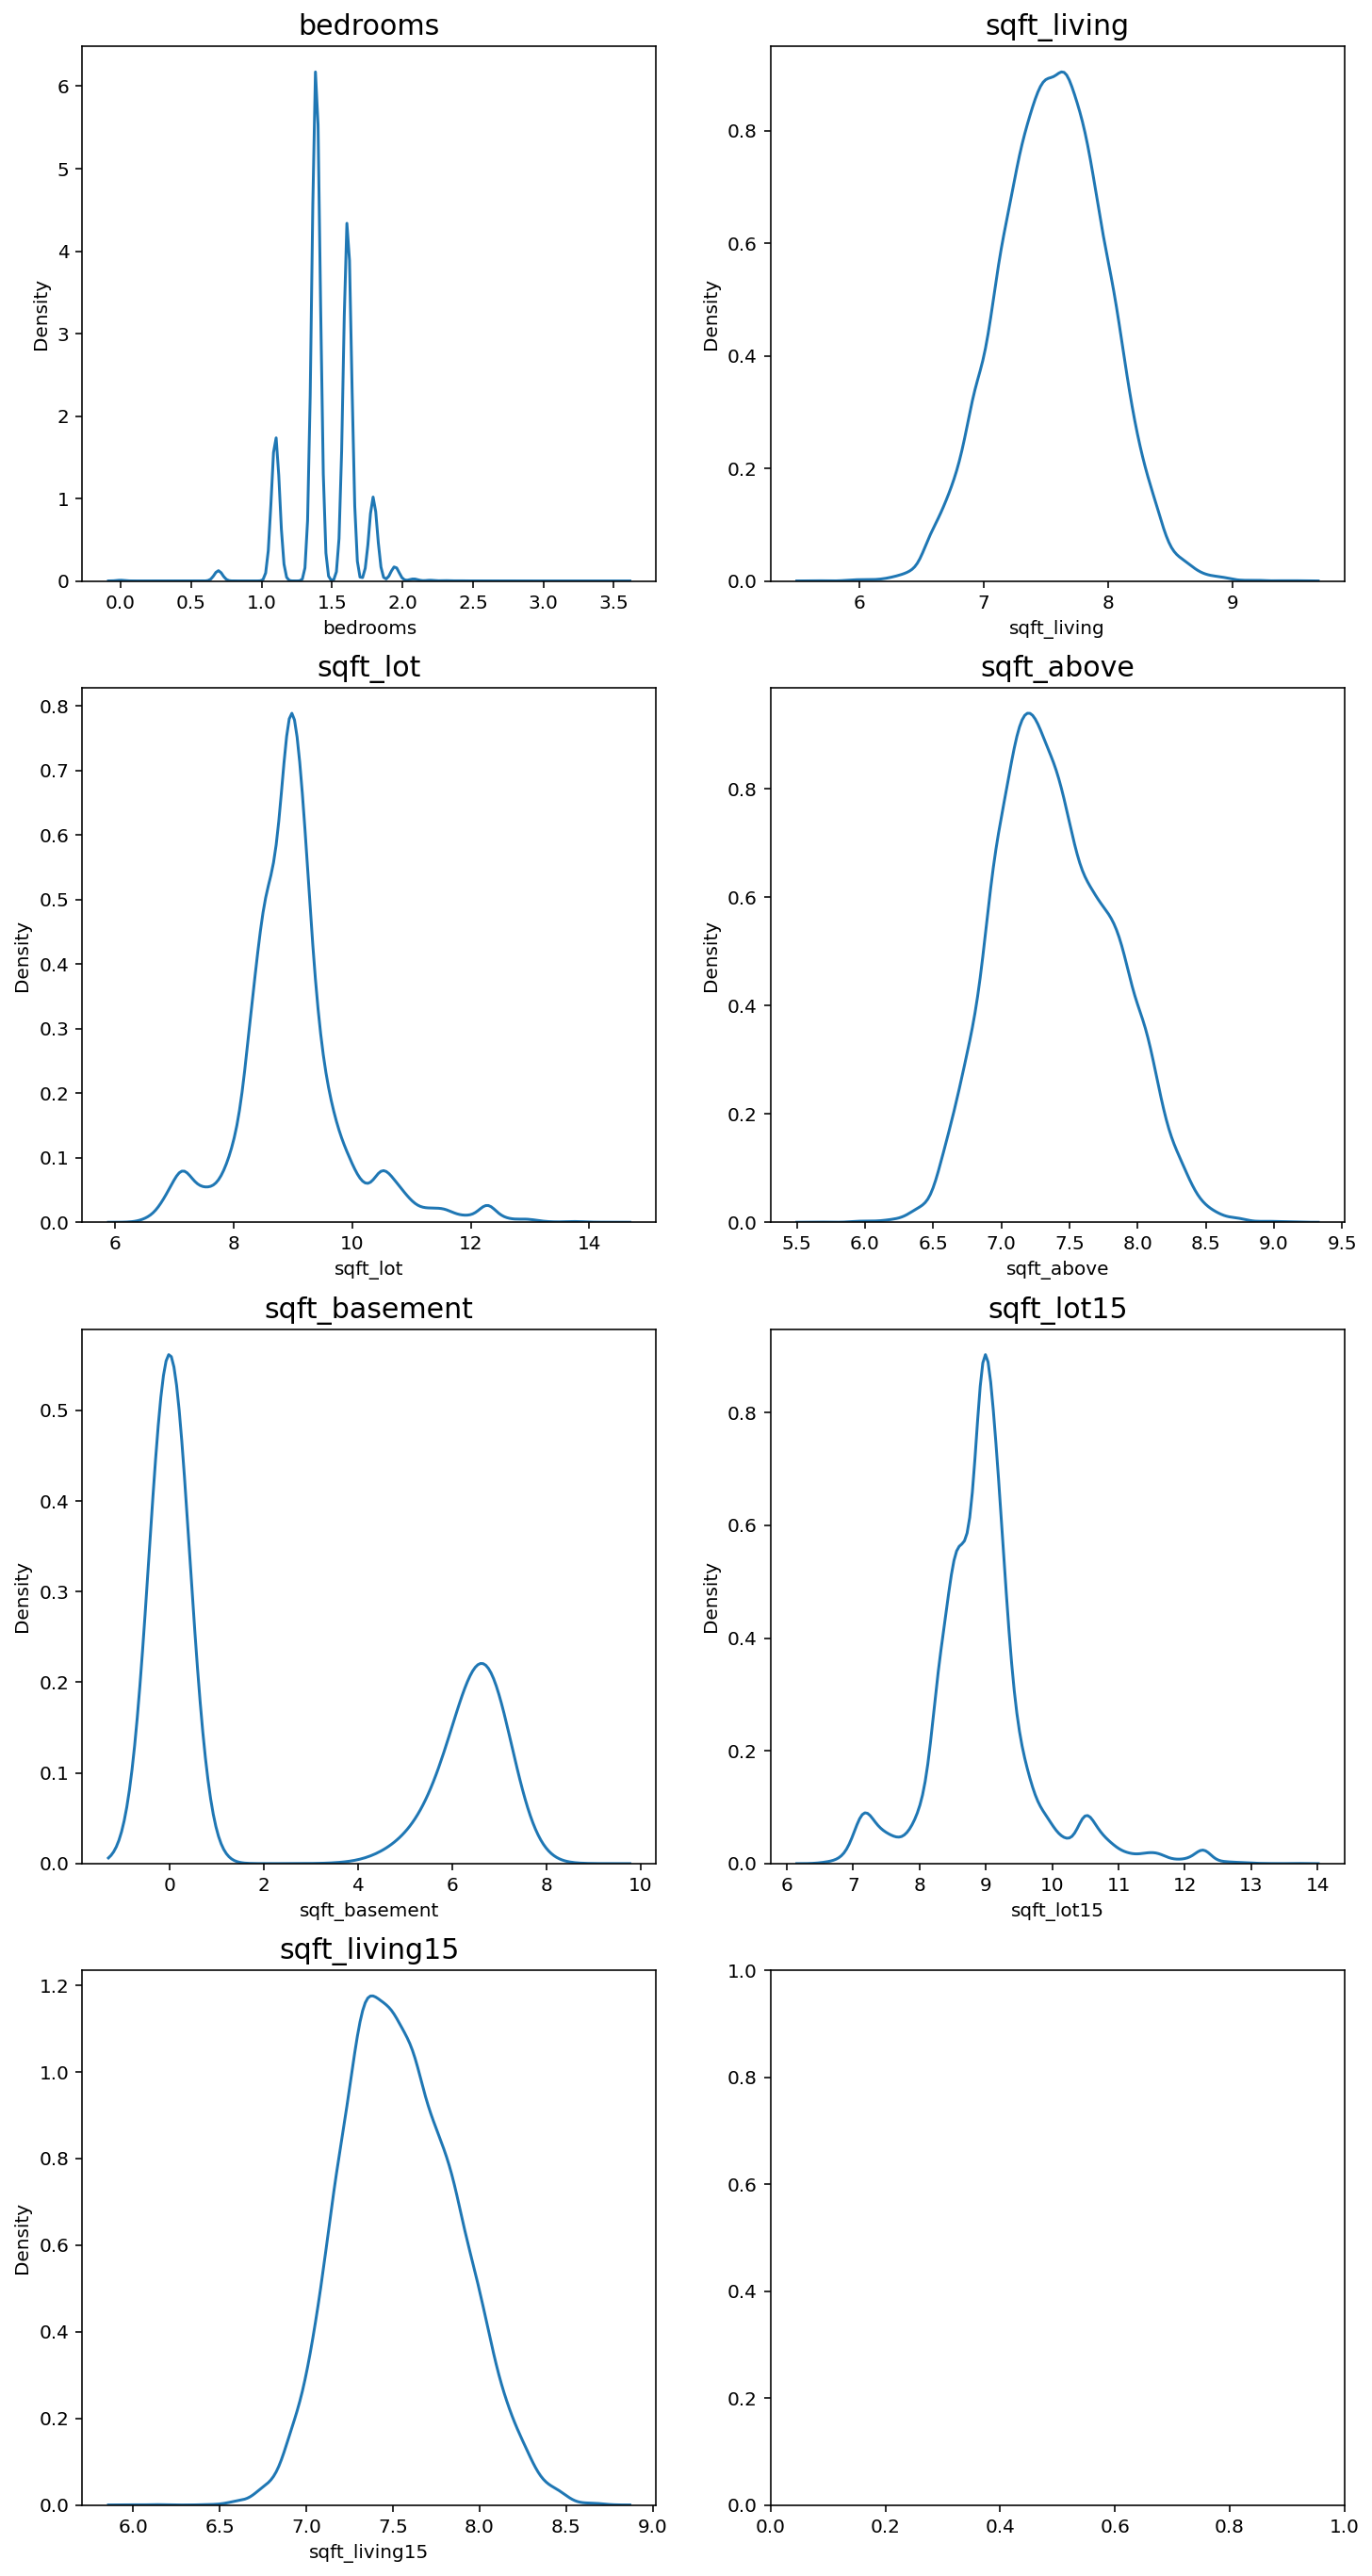

In [17]:
fig, ax = plt.subplots(4, 2, figsize=(12, 24))

count = 0
for row in range(4):
    for col in range(2):
        if count == 7:
            break
        sns.kdeplot(data=data[skew_columns[count]], ax=ax[row][col])
        ax[row][col].set_title(skew_columns[count], fontsize=15)
        count += 1

* 어느정도 치우침이 줄어든 분포를 확인할 수 있습니다.
* 캐글 데이터와 차이가 있어서 변수 변환해줌

#### 왜 로그 변환은 분포의 치우침을 줄어들게 만들까요?
로그 함수의 형태를 보면 알 수 있음



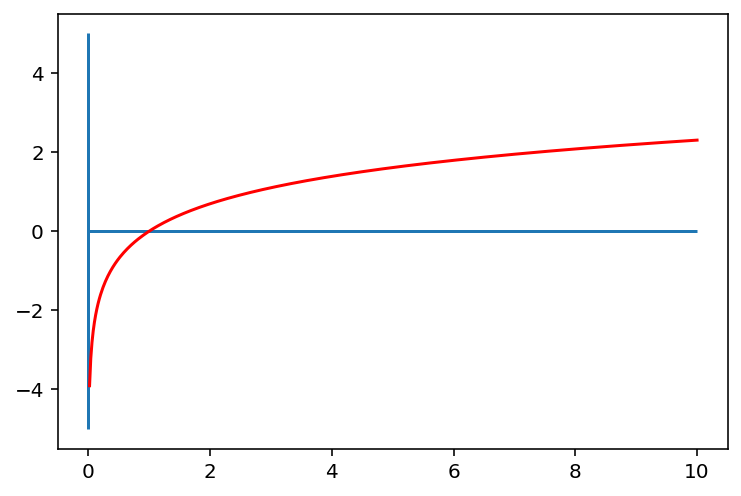

In [18]:
xx = np.linspace(0, 10, 500)
yy = np.log(xx)

plt.hlines(0, 0, 10)
plt.vlines(0, -5, 5)
plt.plot(xx, yy, c='r')
plt.show()

**로그함수 특징**
* 0<x<1 범위에서는 기울기가 매우 가파릅니다. 즉, x의 구간은 (0, 1)(0,1)로 매우 짧은 반면, y의 구간은 (-\infty, 0)(−∞,0)으로 매우 큽니다.
* 따라서 0에 가깝게 모여있는 값들이 x로 입력되면, 그 함수값인 y 값들은 매우 큰 범위로 벌어지게 됩니다. 즉, 로그 함수는 0에 가까운 값들이 조밀하게 모여있는 입력값을, 넓은 범위로 펼칠 수 있는 특징을 가집니다.
* 반면, x값이 점점 커짐에 따라 로그 함수의 기울기는 급격히 작아집니다. 이는 곧 큰 x값들에 대해서는 y값이 크게 차이나지 않게 된다는 뜻이고, 따라서 넓은 범위를 가지는 x를 비교적 작은 y값의 구간 내에 모이게 하는 특징을 가집니다.


* 우리가 맞추어야 할 타겟인 집의 가격, data[price]의 분포로 로그 변환 결과 유추하기 

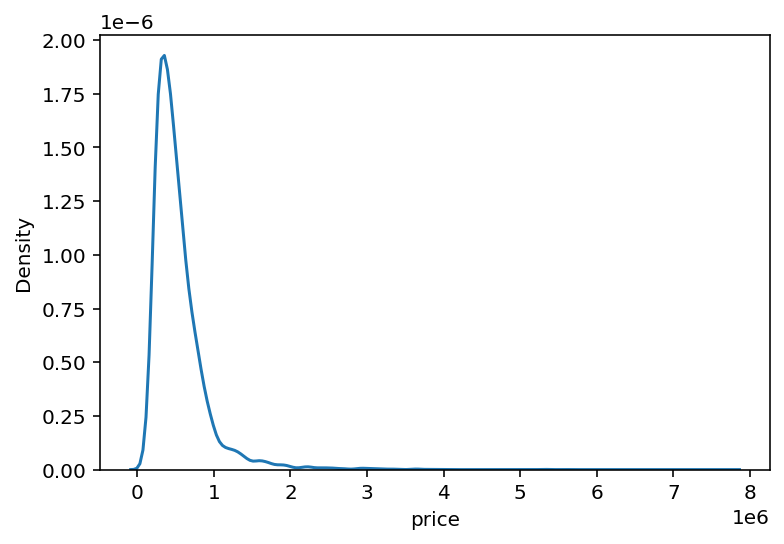

In [19]:
# 원래 Price의 분포
sns.kdeplot(y)
plt.show()

**위 분포를 log 변환하면 어떤 모양?**
* 이 분포에 로그 변환을 취하면, 0에 가깝게 몰려있는 데이터들은 넓게 퍼질 것이고, 매우 크게 퍼져있는 소수의 데이터들은 작은 y값으로 모일 것이다.
* 즉, 왼쪽으로 치우친 값들은 보다 넓은 범위로 고르게 퍼지고 오른쪽으로 얇고 넓게 퍼진 값들은 보다 작은 범위로 모이게 되므로 전체 분포는 정규분포의 형상을 띄는 방향으로 변환될 것이다.

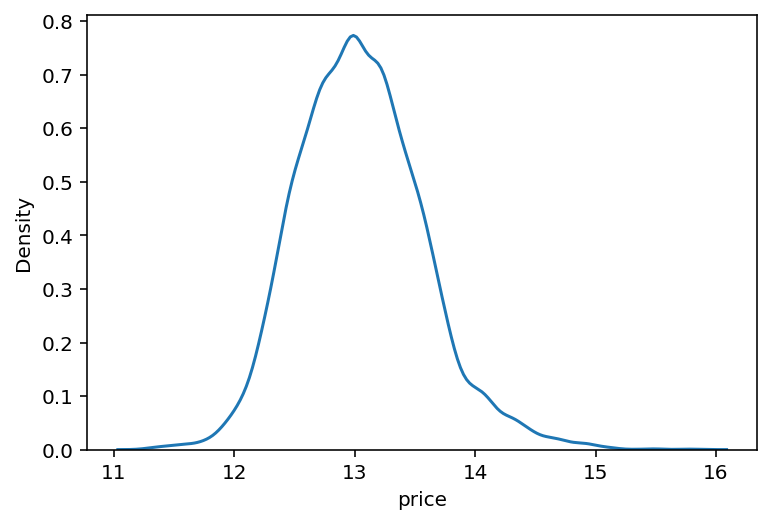

In [20]:
# 위 분포를 log 변환했을 때
y_log_transformation = np.log1p(y)

sns.kdeplot(y_log_transformation)
plt.show()

* train_len을 인덱스로 활용해서 :train_len까지는 학습 데이터, 즉 x에 저장하고, train_len: 부터는 실제로 추론을 해야 하는 테스트 데이터, 즉 sub 변수에 저장

In [21]:
print(train_len)
sub = data.iloc[train_len:, :]
x = data.iloc[:train_len, :]

print(x.shape)
print(sub.shape)

15035
(15035, 19)
(6468, 19)


## 3. Baseline 모델 설계
### 3-1. 모델링
* Baseline 커널에서는 여러 가지 모델을 함께 사용해서 결과를 섞는 블렌딩(Blending)이라는 기법을 활용
* 블렌딩 Blending
  * 하나의 개별 모델을 사용하는 것이 아니라 다양한 여러 모델을 종합하여 결과를 얻는 기법
  * 앙상블 기법이라고도 함
 
  
### 3-2. 앙상블 기법 (Ensemble)
* 여러 개의 학습 알고리즘을 사용하고, 그 예측을 결합함으로써 보다 정확한 최종 예측을 도출하는 기법
* 하나의 강한 머신러닝 알고리즘보다 여러 개의 약한 머신러닝 알고리즘이 낫다는 아이디어로부터 시작됨

* 보팅(Voting)
  * 분류에서 사용
  * 여러 모델이 분류해 낸 결과들로부터 마라 그대로 다수결 투표를 통해 최종 결과를 선택하는 방법
  * categorical
* 에버리징(Averaging)
  * 회귀에서 사용
  * 각 모델이 계산해 낸 실숫값들을 평균 혹은 가중평균하여 사용하는 방법
  * numerical
 
QUIZ - Notion

  
### 3-3. Average Blending
* 여러가지 모델의 결과를 산술 평균을 통해 Blending 모델을 만들겠습니다.
* 모델은 부스팅 계열인 gboost, xgboost, lightgbm
  * gboost
  
  * xgboost
  
  * lightgbm

In [22]:
gboost = GradientBoostingRegressor(random_state=2019)
xgboost = xgb.XGBRegressor(random_state=2019)
lightgbm = lgb.LGBMRegressor(random_state=2019)

models = [{'model':gboost, 'name':'GradientBoosting'}, {'model':xgboost, 'name':'XGBoost'},
          {'model':lightgbm, 'name':'LightGBM'}]

### 3-4. Cross Validation
교차 검증을 통해 모델의 성능을 간단히 평가하겠습니다.

In [23]:
def get_cv_score(models):
    kfold = KFold(n_splits=5).get_n_splits(x.values)
    for m in models:
        CV_score = np.mean(cross_val_score(m['model'], X=x.values, y=y, cv=kfold))
        print(f"Model: {m['name']}, CV score:{CV_score:.4f}")


In [24]:
get_cv_score(models)

Model: GradientBoosting, CV score:0.8598
Model: XGBoost, CV score:0.8860
Model: LightGBM, CV score:0.8819


### 3-5. Make Submission

* cross_val_score()
  * 회귀 모델의 경우에는 cross_val_score 함수가 R<sup>2</sup>를 반환합니다.
  * R<sup>2</sup> 값이 1에 가까울수록 모델이 데이터를 잘 표현함을 나타냅니다. 3개 트리 모델이 상당히 훈련 데이터에 대해 괜찮은 성능을 보여주고 있습니다.

* AveragingBlending()
  * 여러 모델을 입력하고 각 모델에 대한 예측 결과를 평균 내어 주는 함수
  * models 딕셔너리 안에 있는 모델을 모두 x와 y로 학습시킨 뒤, predictions 에 그 예측 결괏값을 모아서 평균한 값을 반환
  
 

In [25]:
def AveragingBlending(models, x, y, sub_x):
    for m in models : 
        m['model'].fit(x.values, y)
    
    predictions = np.column_stack([
        m['model'].predict(sub_x.values) for m in models
    ])
    return np.mean(predictions, axis=1)

* 함수를 활용해서 예측값 생성하기

In [26]:
y_pred = AveragingBlending(models, x, y, sub)
print(len(y_pred))
y_pred

6468


array([ 529966.66304912,  430726.21272617, 1361676.91242777, ...,
        452081.69137012,  341572.97685942,  421725.1231835 ])

* 제출해야 하는 CSV 파일 샘플이 data/sample_submission.csv 파일

In [27]:
data_dir = os.getenv('HOME')+'/aiffel/Exploration/E_05/kaggle_kakr_housing/data'

submission_path = join(data_dir, 'sample_submission.csv')
submission = pd.read_csv(submission_path)
submission.head()

,id,price
0,15035,100000
1,15036,100000
2,15037,100000
3,15038,100000
4,15039,100000


* 파일은 id와 price 의 두 가지 열로 구성되어있음
* 이에 맞게 id와 price로 구성된 데이터프레임 만들어야함

In [28]:
sub = pd.DataFrame(data={'id':sub_id,'price':y_pred})
sub.head()

,id,price
0,15035,5.299667e+05
1,15036,4.307262e+05
2,15037,1.361677e+06
3,15038,3.338036e+05
4,15039,3.089006e+05


* join() 함수

In [29]:
my_submission_path = join(data_dir, 'submission.csv')
sub.to_csv('submission.csv', index=False)

print(my_submission_path)

/aiffel/aiffel/Exploration/E_05/kaggle_kakr_housing/data/submission.csv


## 4. 최적의 모델 만들기
### 4-1. 하이퍼 파라미터 튜닝

* 파라미터
  * 모델 파라미터는 모델이 학습을 하면서 점차 최적화되는, 그리고 최적화가 되어야 하는 파라미터입니다.
  * 예를 들어 선형 회귀의 경우 y_pred = W*x + b 라는 식으로 예측값을 만들어 낼 텐데, 여기에서 모델 파라미터는 W 입니다. 모델은 학습 과정을 거치면서 최적의 y_pred 값, 즉 y_true에 가장 가까운 값을 출력해낼 수 있는 최적의 W를 찾아나갈 것입니다.
* 하이퍼 파라미터 
  * 하이퍼 파라미터는 모델이 학습을 하기 위해서 사전에 사람이 직접 입력해 주는 파라미터입니다.
  * 이는 모델이 학습하는 과정에서 변하지 않습니다. 예를 들어 학습 횟수에 해당하는 epoch 수, 가중치를 업데이트할 학습률(learning rate), 또는 선형 규제를 담당하는 labmda 값 등이 이에 해당합니다.




In [30]:
data_dir = os.getenv('HOME')+'/aiffel/Exploration/E_05/kaggle_kakr_housing/data'

train_data_path = join(data_dir, 'train.csv')
test_data_path = join(data_dir, 'test.csv') 

train = pd.read_csv(train_data_path)
test = pd.read_csv(test_data_path)

train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


Date 6자리로 보기 좋게 편집

In [31]:
train['date'] = train['date'].apply(lambda i: i[:6]).astype(int)
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,201410,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,201502,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,201502,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,201406,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,201501,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


* 타깃값이 price, y 변수에 넣어두기
* train 에서는 삭제하기!


In [32]:
y = train['price']
del train['price']

print(train.columns)

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [33]:
del train['id']

print(train.columns)

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


* test 데이터에 대해서도 같은 작업 진행
* test에서 우리가 맞춰야할 price 가 없으니 훈련 데이터셋과는 다르게 price 에 대한 처리는 안해도됨



In [34]:
test['date'] = test['date'].apply(lambda i: i[:6]).astype(int)

del test['id']

print(test.columns)

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [35]:
y

0         221900.0
1         180000.0
2         510000.0
3         257500.0
4         291850.0
           ...    
15030     610685.0
15031    1007500.0
15032     360000.0
15033     400000.0
15034     325000.0
Name: price, Length: 15035, dtype: float64

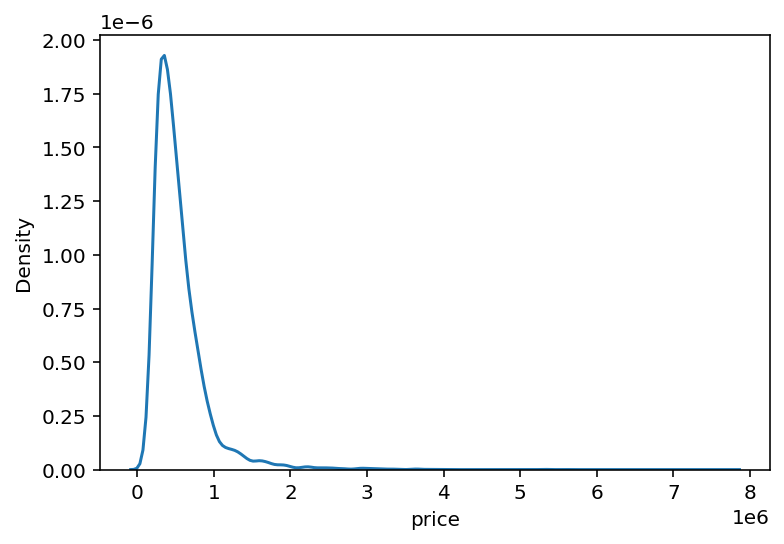

In [36]:
sns.kdeplot(y)
plt.show()

* 다른 값처럼 왼쪽으로 크게 치우져쳐있음
* np.log1p() 함수를 통해 로그 변환 해주고 나중에 모델이 값을 예측한 후에 다시 np.expm1()을 활용해서 되돌릴 예정
* np.explm()은 np.log1p()와는 반대로 각 원소 x마다 exp(x)-1 값을 반환함


In [37]:
y = np.log1p(y)
y

0        12.309987
1        12.100718
2        13.142168
3        12.458779
4        12.583999
           ...    
15030    13.322338
15031    13.822984
15032    12.793862
15033    12.899222
15034    12.691584
Name: price, Length: 15035, dtype: float64

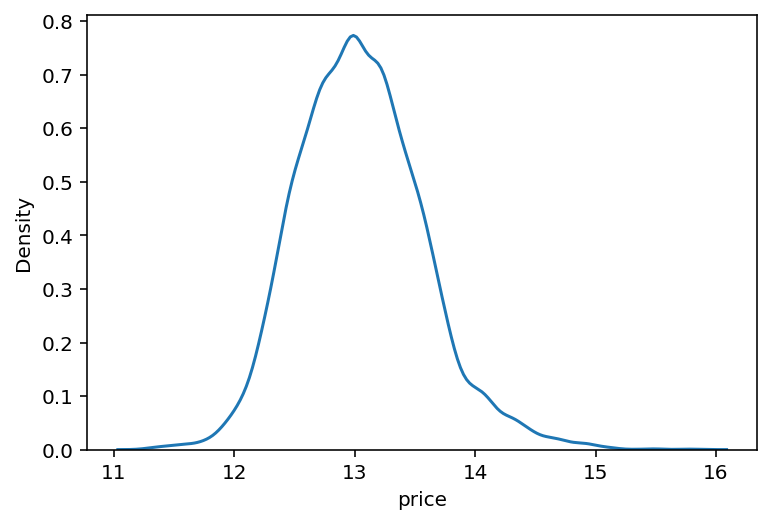

In [38]:
sns.kdeplot(y)
plt.show()

In [39]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           15035 non-null  int64  
 1   bedrooms       15035 non-null  int64  
 2   bathrooms      15035 non-null  float64
 3   sqft_living    15035 non-null  int64  
 4   sqft_lot       15035 non-null  int64  
 5   floors         15035 non-null  float64
 6   waterfront     15035 non-null  int64  
 7   view           15035 non-null  int64  
 8   condition      15035 non-null  int64  
 9   grade          15035 non-null  int64  
 10  sqft_above     15035 non-null  int64  
 11  sqft_basement  15035 non-null  int64  
 12  yr_built       15035 non-null  int64  
 13  yr_renovated   15035 non-null  int64  
 14  zipcode        15035 non-null  int64  
 15  lat            15035 non-null  float64
 16  long           15035 non-null  float64
 17  sqft_living15  15035 non-null  int64  
 18  sqft_l

### 4-2. 함수 사용

#### 본격적으로 모델 튜닝하기

* 머신러닝 모델을 학습시키고 튜닝을 하다보면 몇 시간 훌쩍 지날만큼 실험해볼 것들이 많음
* 보다 다양하고 많은 실험을 하기 위해서는, 그만큼 실험을 위한 도구들이 잘 준비되어 있는 것이 유리함
* 여러 가지 반복되는 작업들은 함수로 먼저 만들어 놓고 많은 실험을 하는 것이 좋음

#### RMSE 계산
* mean_squared_error
  * RMSE 점수를 계산하기 위한 함수
  
 

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

* y_test, y_pred는 위에서 np.log1p()로 변환된 값이기 때문에 원래 데이터의 단위에 맞게 되돌리기 위해 np.expm1() 추가해야함
* exp로 변환해서 mean_squared_error를 계산한 값에 np.sqrt를 하면 RMSE 값


In [41]:
def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred)))


네 가지 모델 가져오기

In [42]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor


* 모델 인스턴스 생성 후 models 라는 리스트에 넣어주기
* 모델 파라미터 초기화나 데이터셋 구성에 사용되는 랜덤시드값인 random_State 값을 특정 값으로 고정시키거나 지정하지 않고 None 사용 가느

* Random state를 고정값으로 주면 모델과 데이터셋이 동일한ㄱ ㅕㅇ우 머신러닝 학습 결과도 항상 동일하게 재현됨
* 지정하지 않고 None 으로 두면 모델 내부에서 랜덤 시드값을 임의로 선택해서 결과적으로 파라미터 초기화나 데이터셋 구성 양상이 달라져서 모델과 데이터셋이 동일해도 학습 결과가 학습할때마다 달라질 수 있음


In [43]:
# random_state는 모델초기화나 데이터셋 구성에 사용되는 랜덤 시드값입니다. 
#random_state=None    # 이게 초기값입니다. 아무것도 지정하지 않고 None을 넘겨주면 모델 내부에서 임의로 선택합니다.  
random_state=2020        # 하지만 우리는 이렇게 고정값을 세팅해 두겠습니다. 

gboost = GradientBoostingRegressor(random_state=random_state)
xgboost = XGBRegressor(random_state=random_state)
lightgbm = LGBMRegressor(random_state=random_state)
rdforest = RandomForestRegressor(random_state=random_state)

models = [gboost, xgboost, lightgbm, rdforest]


In [44]:
gboost.__class__.__name__

'GradientBoostingRegressor'

In [45]:
df = {}

for model in models:
    # 모델 이름 획득
    model_name = model.__class__.__name__

    # train, test 데이터셋 분리 - 여기에도 random_state를 고정합니다. 
    X_train, X_test, y_train, y_test = train_test_split(train, y, random_state=random_state, test_size=0.2)

    # 모델 학습
    model.fit(X_train, y_train)
    
    # 예측
    y_pred = model.predict(X_test)

    # 예측 결과의 rmse값 저장
    df[model_name] = rmse(y_test, y_pred)
    
    # data frame에 저장
    score_df = pd.DataFrame(df, index=['RMSE']).T.sort_values('RMSE', ascending=False)
    
df

{'GradientBoostingRegressor': 128360.19649691365,
 'XGBRegressor': 110318.66956616656,
 'LGBMRegressor': 111920.36735892233,
 'RandomForestRegressor': 125487.07102453562}

위의 내용을 함수로 만들기!

In [46]:
def get_scores(models, train, y):
    df = {}
    
    for model in models:
        model_name = model.__class__.__name__
        
        X_train, X_test, y_train, y_test = train_test_split(train, y, random_state=random_state, test_size=0.2)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        df[model_name] = rmse(y_test, y_pred)
        score_df = pd.DataFrame(df, index=['RMSE']).T.sort_values('RMSE', ascending=False)
            
    return score_df
get_scores(models, train, y)

,RMSE
GradientBoostingRegressor,128360.196497
RandomForestRegressor,125487.071025
LGBMRegressor,111920.367359
XGBRegressor,110318.669566


### 4-3. 그리드 탐색
* 모델과 데이터셋, RMSE 결과값을 나타내주는 함수가 준비되어있음
* 다양한 하이퍼 파라미터로 실험하기

In [47]:
from sklearn.model_selection import GridSearchCV

**하이퍼 파라미터를 조합해보는 방법**

* 그리드 탐색
  * 사람이 먼저 탐색할 하이퍼 파라미터의 값들을 정해두고 그 값들로 만들어질 수 있는 모든 조합을 탐색
  * 특정 값에 대한 하이퍼 파라미터 조합을 모두 탐색하고자 할 때 유리함
* 랜덤 탐색
  * 사람이 탐색할 하이퍼 파라미터의 공간만 정해두고 안에서 랜덤으로 조합을 선택해서 탐색하는 방법

* 그리드 탐색은 사람이 정해둔 값들로 이루어지는 조합만 탐색해서 최적의 조합을 놓칠 수 있고, 랜덤은 최적의 조합을 찾을 수 있는 가능성은 있지만 그것도 랜덤성에 의존함

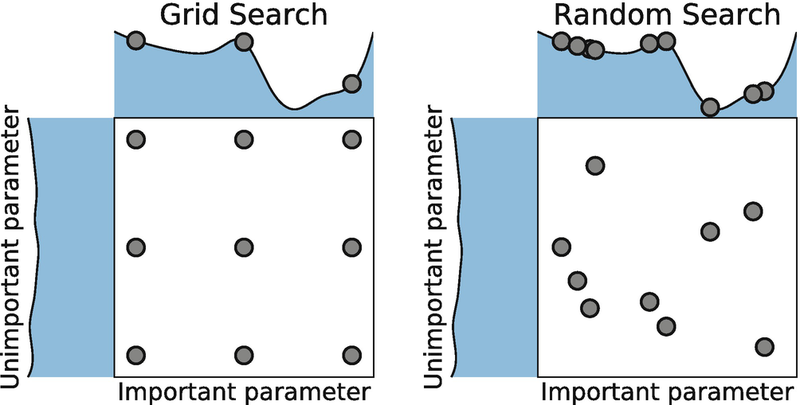

* GridSearchCV
  * param_grid : 탐색할 파라미터의 종류 (딕셔너리로 입력)
  * scoring : 모델의 성능을 평가할 지표
  * cv : cross validation을 수행하기 위해 train 데이터셋을 나누는 조각의 개수
  * verbose : 그리드 탐색을 진행하면서 진행 과정을 출력해서 보여줄 메세지의 양 (숫자가 클수록 더 많은 메세지를 출력합니다.)
  * n_jobs : 그리드 탐색을 진행하면서 사용할 CPU의 개수

In [48]:

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [1, 10],
}

model = LGBMRegressor(random_state=random_state)



* totalling 20 fits
  * 위에서 우리가 입력한 param_grid에 n_estimators 두 가지, max_depth 두 가지를 넣었으므로 가능한 조합은 총 2 × 2 = 4가지입니다.
  * 또한, cross validation은 각 경우마다 5번을 진행하니 총 20 fits를 진행하게 됩니다.
  * 여기에서 cross validation을 5번 진행하는 이유는, 각 조합에 대해 단 한 번만 실험을 하는 것보다 5번을 진행해서 평균을 취하는 것이 일반화 오차를 추정하는 데에 더 신뢰도가 높기 때문입니다. 간단하게, 한 번만 해 보는 것보다는 다섯 번을 해보고 구한 평균값이 더 정확하겠죠!

* 우리가 원하는 값만 정제해서 보기
* params, 

**왜 Score 가 음수일까요?**
* GridSearchCV을 초기화 한 값이 neg_mean_squared_error를
* MSE에 음수를 취한 값인 neg_mean_squared_error를 입력했다.

* Classification, Clustering, Regression 세 가지 점수 체계 사용



* 위 데이터 프레임에 나타난 값은 정확히 말하면 RMSE가 아니라 RMSLE, 즉 Root Mean Squared Log Error.


In [49]:
# 코드 입력
def my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5):
    # GridSearchCV 모델로 초기화
    grid_model = GridSearchCV(model, param_grid=param_grid, scoring='neg_mean_squared_error', \
                              cv=5, verbose=verbose, n_jobs=n_jobs)
    
    # 모델 fitting
    grid_model.fit(train, y)

    # 결과값 저장
    params = grid_model.cv_results_['params']
    score = grid_model.cv_results_['mean_test_score']
    
    # 데이터 프레임 생성
    results = pd.DataFrame(params)
    results['score'] = score
    
    # RMSLE 값 계산 후 정렬
    results['RMSLE'] = np.sqrt(-1 * results['score'])
    results = results.sort_values('RMSLE')

    return results



### 4-4. 제출하기

In [50]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [1, 10],
}

model = LGBMRegressor(random_state=random_state)

my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


,max_depth,n_estimators,score,RMSLE
3,10,100,-0.027027,0.164399
2,10,50,-0.029177,0.170814
1,1,100,-0.055020,0.234564
0,1,50,-0.073394,0.270914


* 가장 좋은 조합은 max_depth = 10, n_estimators = 100
* 해당 모델로 학습을 해서 예측값인 submission.csv 파일 만들고 제출!


In [51]:
model = LGBMRegressor(max_depth=10, n_estimators=100, random_state=random_state)


np.expm1() 씌워서 원래 스케일로 돌려주기!

In [52]:

def save_submission(model, train, y, test, model_name, rmsle=None):
    model.fit(train, y)
    prediction = model.predict(test)
    prediction = np.expm1(prediction)
    data_dir = os.getenv('HOME')+'/aiffel/Exploration/E_05/kaggle_kakr_housing/data'
    submission_path = join(data_dir, 'sample_submission.csv')
    submission = pd.read_csv(submission_path)
    submission['price'] = prediction
    submission_csv_path = '{}/submission_{}_RMSLE_{}.csv'.format(data_dir, model_name, rmsle)
    submission.to_csv(submission_csv_path, index=False)
    print('{} saved!'.format(submission_csv_path))

In [53]:
save_submission(model, train, y, test, 'lgbm', rmsle='0.0168')

/aiffel/aiffel/Exploration/E_05/kaggle_kakr_housing/data/submission_lgbm_RMSLE_0.0168.csv saved!


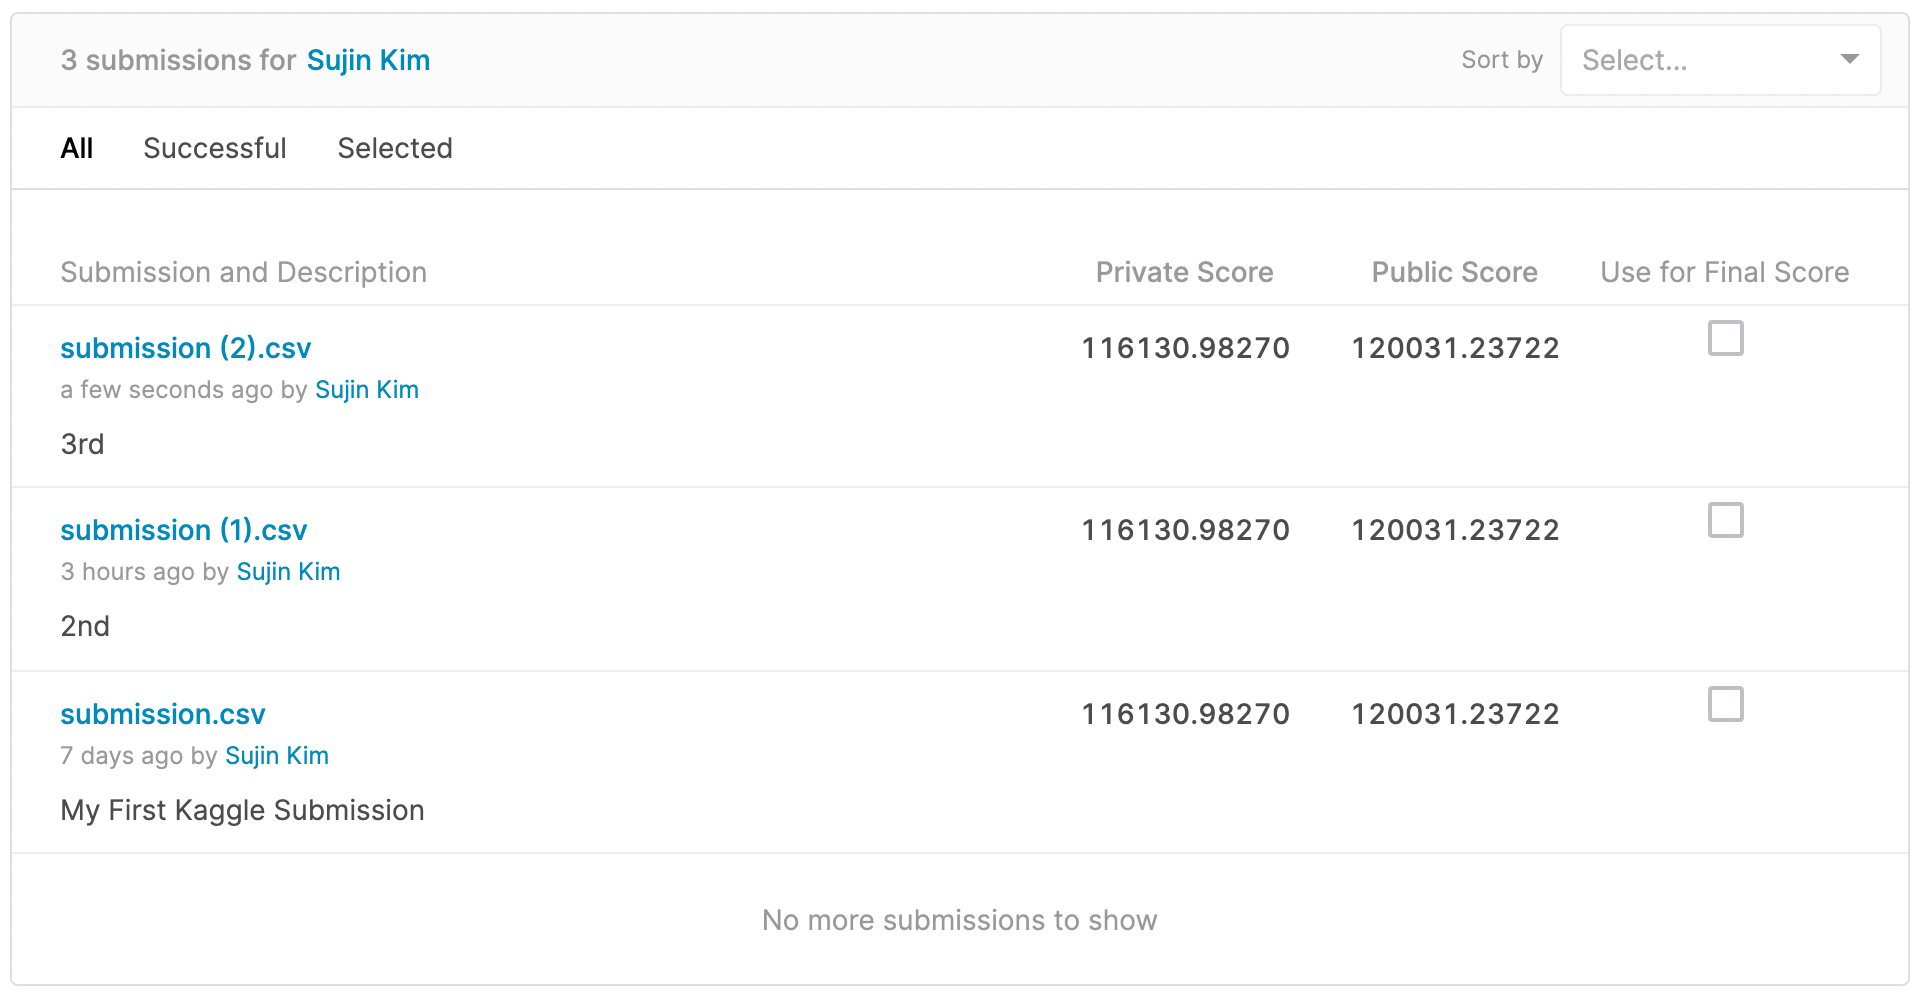

## 5. 회고
### 5-1. 이번 프로젝트에서 어려웠던 점      
* 캐글을 처음 접해서 무슨 내용인지 파악하는데 굉장히 시간이 오래 걸렸습니다. 😭
* 아직 모델이라는 것도 완벽하게 숙지가 되지 않은 상태였고 파라미터에 대한 개념도 잡히지 않은 상태라 그동안의 Exploration 과는 다르게 파라미터 튜닝을 해서 모델의 성능을 올려야하는 점이 정말 어려웠습니다.
* 이번 프로젝트는 이전처럼 새롭게 알게된 내용에 대한 정리로 마무리하려고 합니다.


### 5-2. 루브릭 평가 지표를 맞추기 위해 시도한 것들       
* 하이퍼 파라미터에 대한 내용을 알지 못해 루브릭 평가 지표를 맞추기 위해 시도한 것이 없습니다.


### 5-3. 앞으로 더 공부할 내용    
* 캐글
* 하이퍼 파라미터
* 각 모델 

### 5-4. 참고사이트   
* LGBMRegressor   
https://greatjoy.tistory.com/72


* XGBRegressor   
https://machinelearningmastery.com/xgboost-for-regression/
https://wooono.tistory.com/97


* Kaggle   
https://velog.io/@kwonhl0211/Hello-Kaggle-캐글이-처음인-분들을-위한-캐글-가이드


* pd.concat()   
https://rfriend.tistory.com/256


* EDA   
https://eda-ai-lab.tistory.com/13


* missingno 라이브러리   
https://chunggaeguri.tistory.com/entry/Visualization-missingno-라이브러리-사용법


* Boxplot   
https://bioinformaticsandme.tistory.com/245
